In [2]:
"""This example shows the ability of the WhiteKernel to estimate the noise level in the data. 
Moreover, we show the importance of kernel hyperparameters initialization."""

'This example shows the ability of the WhiteKernel to estimate the noise level in the data. \nMoreover, we show the importance of kernel hyperparameters initialization.'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

[ 0.5         0.99448427  1.35959818  1.49981813  1.37845883  1.02727112
  0.53813513  0.03902197 -0.33948697 -0.49836358 -0.39604148 -0.05929088
  0.42378522  0.92680116  1.31815446  1.49545659  1.41232056  1.09049698
  0.61418355  0.10799663 -0.29563168 -0.49110139 -0.42727238 -0.12084402
  0.3480138   0.85663529  1.27195141  1.48530433  1.44087518  1.15028784]


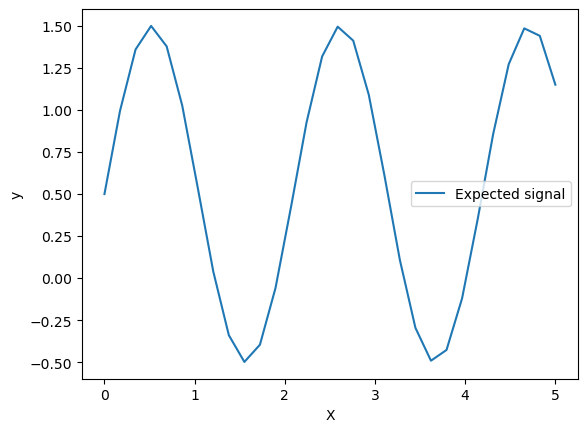

In [4]:
start_time = time.time()

def target_generator(X, add_noise=False):
    """function that will generate the target to be predicted. 
    We will add an option to add some noise to the generated target."""
    target = 0.5 + np.sin(3 * X)
    if add_noise:
        rng = np.random.RandomState(1)
        target += rng.normal(0, 0.3, size=target.shape)
    return target.squeeze()

X = np.linspace(0, 5, num=30).reshape(-1, 1)
y = target_generator(X, add_noise=False)
print(y)
# Let’s have a look to the target generator where we will not add any noise to observe the signal that we would like to predict.

plt.plot(X, y, label="Expected signal")
plt.legend()
plt.xlabel("X")
_ = plt.ylabel("y")

In [5]:
rng = np.random.RandomState(0)
X_train = rng.uniform(0, 5, size=20).reshape(-1, 1)
y_train = target_generator(X_train, add_noise=True)
print(X_train)
print(y_train)
# generate few noisy training samples

[[2.74406752]
 [3.57594683]
 [3.01381688]
 [2.72441591]
 [2.118274  ]
 [3.22947057]
 [2.18793606]
 [4.458865  ]
 [4.8183138 ]
 [1.91720759]
 [3.95862519]
 [2.6444746 ]
 [2.84022281]
 [4.62798319]
 [0.35518029]
 [0.4356465 ]
 [0.10109199]
 [4.16309923]
 [3.89078375]
 [4.35006074]]
[ 1.91662667 -0.64789981  0.71555685  1.12757543  0.83119772 -0.45105206
  1.30039773  0.99607981  1.54564487 -0.08169199  0.30171348  0.87880392
  1.18914966  1.35289511  1.71518169  1.1354239   0.7469198   0.15964583
 -0.26693117  1.14000126]


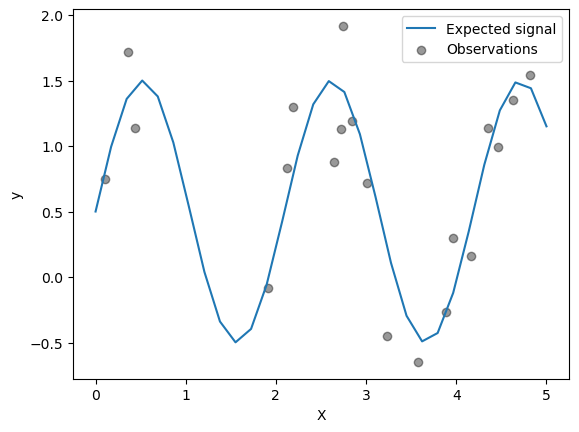

In [6]:
plt.plot(X, y, label="Expected signal")
plt.scatter(
    x=X_train[:, 0],
    y=y_train,
    color="black",
    alpha=0.4,
    label="Observations",
)
plt.legend()
plt.xlabel("X")
_ = plt.ylabel("y")

In [7]:
# Now, we will create a GaussianProcessRegressor using an additive kernel adding a RBF and WhiteKernel kernels. 
# The WhiteKernel is a kernel that will able to estimate the amount of noise present in the data while the RBF 
# will serve at fitting the non-linearity between the data and the target.

# However, we will show that the hyperparameter space contains several local minima. It will highlights 
# the importance of initial hyperparameter values.

# We will create a model using a kernel with a high noise level and a large length scale, 
# which will explain all variations in the data by noise.

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel = 1.0 * RBF(length_scale=1e1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1, noise_level_bounds=(1e-5, 1e1)
)
print(kernel)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
print(gpr)
gpr.fit(X_train, y_train)
y_mean, y_std = gpr.predict(X, return_std=True)


1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1)
GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=10) + WhiteKernel(noise_level=1))


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


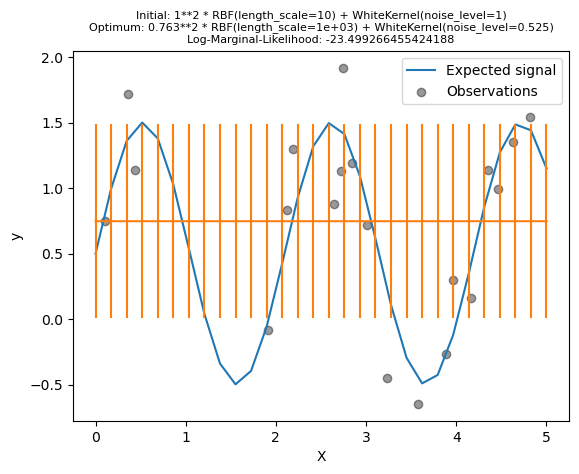

In [8]:
plt.plot(X, y, label="Expected signal")
plt.scatter(x=X_train[:, 0], y=y_train, color="black", alpha=0.4, label="Observations")
plt.errorbar(X, y_mean, y_std)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
_ = plt.title(
    (
        f"Initial: {kernel}\nOptimum: {gpr.kernel_}\nLog-Marginal-Likelihood: "
        f"{gpr.log_marginal_likelihood(gpr.kernel_.theta)}"
    ),
    fontsize=8,
)

In [9]:
kernel = 1.0 * RBF(length_scale=1e-1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1e-2, noise_level_bounds=(1e-10, 1e1)
)
print(kernel)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
print(gpr)
gpr.fit(X_train, y_train)
y_mean, y_std = gpr.predict(X, return_std=True)

1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01)
GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01))


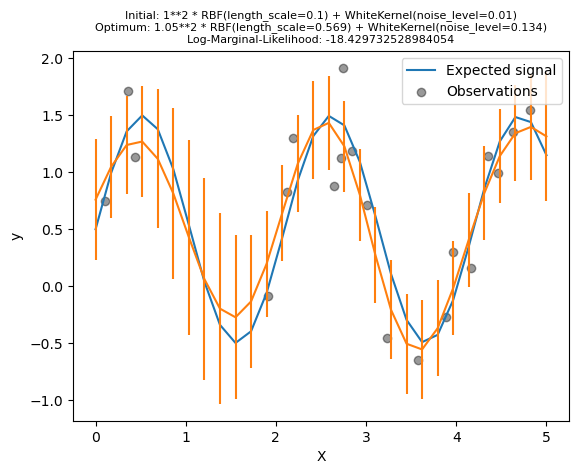

In [10]:
plt.plot(X, y, label="Expected signal")
plt.scatter(x=X_train[:, 0], y=y_train, color="black", alpha=0.4, label="Observations")
plt.errorbar(X, y_mean, y_std)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
_ = plt.title(
    (
        f"Initial: {kernel}\nOptimum: {gpr.kernel_}\nLog-Marginal-Likelihood: "
        f"{gpr.log_marginal_likelihood(gpr.kernel_.theta)}"
    ),
    fontsize=8,
)

In [11]:
from matplotlib.colors import LogNorm

length_scale = np.logspace(-2, 4, num=50)
noise_level = np.logspace(-2, 1, num=50)
length_scale_grid, noise_level_grid = np.meshgrid(length_scale, noise_level)

log_marginal_likelihood = [
    gpr.log_marginal_likelihood(theta=np.log([0.36, scale, noise]))
    for scale, noise in zip(length_scale_grid.ravel(), noise_level_grid.ravel())
]
log_marginal_likelihood = np.reshape(
    log_marginal_likelihood, newshape=noise_level_grid.shape
)

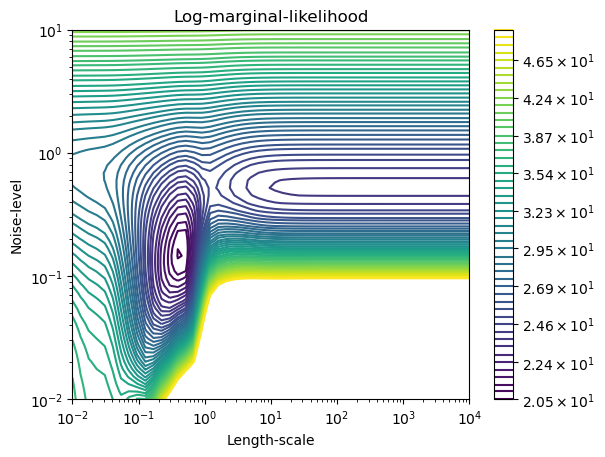

In [12]:
vmin, vmax = (-log_marginal_likelihood).min(), 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), num=50), decimals=1)
plt.contour(
    length_scale_grid,
    noise_level_grid,
    -log_marginal_likelihood,
    levels=level,
    norm=LogNorm(vmin=vmin, vmax=vmax),
)
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.show()

In [13]:
end_time = time.time()

runtime = end_time - start_time
print(f"\nTotal runtime: {runtime} seconds")


Total runtime: 1.868407964706421 seconds
